In [294]:
import pandas as pd

In [342]:
df = pd.read_csv("2010-2016.csv")

/var/folders/t0/gccsxj_j0nggb15blb8q8h900000gn/T/ipykernel_10391/856940257.py:1: DtypeWarning: Columns (6,7,9,29,31,32,43,48,49,50,51,52,53,54,59,60,77,83,89,90,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2010-2016.csv")


In [343]:
df.shape

(495628, 95)

In [288]:
df= df[df['PG'] != 1.]

In [482]:
df['Early Outcome'].unique()

array(['None ', nan, 'Biochemical Pregnancy Only ',
       'Intrauterine Fetal Pulsation Seen ', 'Misscarriage ',
       'Misscarriage ,Intrauterine Fetal Pulsation Seen ', 'Ectopic ',
       'Hetrotopic ', 'Hetrotopic ,Intrauterine Fetal Pulsation Seen ',
       'None ,Misscarriage ', 'Ectopic ,Hetrotopic ',
       'Biochemical Pregnancy Only ,Intrauterine Fetal Pulsation Seen ',
       'None ,Ectopic ', 'Molar ', 'None ,Biochemical Pregnancy Only ',
       'None ,Intrauterine Fetal Pulsation Seen ',
       'Biochemical Pregnancy Only ,Misscarriage ',
       'Molar ,Intrauterine Fetal Pulsation Seen ', 'None ,Molar ',
       'Ectopic ,Intrauterine Fetal Pulsation Seen ',
       'Biochemical Pregnancy Only ,Ectopic ', 'Misscarriage ,Ectopic '],
      dtype=object)

In [436]:
df = df[df['Total number of DI pregnancies'] == 0]

In [452]:
df.shape

(198604, 95)

In [462]:
df['Live Birth Occurrence'] = df['Live Birth Occurrence'].fillna(0)

In [497]:


columns_to_drop = [
    'Total number of DI pregnancies',
    'Total number of live births - conceived through IVF or DI',
    'Total number of live births - conceived through DI',
    'Total Number of Previous DI cycles',
    'Total number of previous pregnancies, Both IVF and DI',
    'Date patient started trying to become pregnant OR date of last pregnancy',
    'Total Number of Previous cycles, Both IVF and DI',
    'Total Number of Previous treatments, Both IVF and DI at clinic'
]


df.drop(columns=columns_to_drop, inplace=True)

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198604 entries, 1 to 481984
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Patient Age at Treatment                                     198604 non-null  object 
 1   Total Number of Previous IVF cycles                          198604 non-null  object 
 2   Total number of IVF pregnancies                              198604 non-null  object 
 3   Total number of live births - conceived through IVF          198604 non-null  int64  
 4   Type of Infertility - Female Primary                         198604 non-null  int64  
 5   Type of Infertility - Female Secondary                       198604 non-null  int64  
 6   Type of Infertility - Male Primary                           198604 non-null  int64  
 7   Type of Infertility - Male Secondary                         198604 no

In [505]:
b = df.copy()

In [507]:
b.shape #백업

(198604, 31)

In [626]:

# 나이 범위 문자열에 따라 숫자로 변환하는 함수 정의
def convert_age(age):
    if age == '18-34':
        return 0
    elif age == '35-37':
        return 1
    elif age == '38 - 39':
        return 2
    elif age == '40-42':
        return 3
    elif age == '43-44':
        return 4
    elif age == '45-50':
        return 5
    else:
        return 999  # 범위 밖의 나이는 None으로 처리

# 'Patient Age at Treatment' 열을 변환
df['Patient Age at Treatment'] = df['Patient Age at Treatment'].apply(convert_age)


In [622]:
df['Patient ID'] = range(0, len(df))

# 'Patient ID' 열을 데이터프레임의 첫 번째 열로 이동
df = df[['Patient ID'] + [col for col in df.columns if col != 'Patient ID']]




In [517]:
b.head()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,...,Stimulation used,Egg Source,Sperm From,Fresh Cycle,Frozen Cycle,Eggs Thawed,Fresh Eggs Collected,Eggs Mixed With Partner Sperm,Embryos Transfered,Live Birth Occurrence
1,45-50,3,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,4,3,2.0,0.0
2,35-37,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,12,0,0.0,0.0
8,18 - 34,3,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,31,13,0.0,0.0
14,18 - 34,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,8,8,0.0,0.0
15,35-37,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,11,11,1.0,0.0


In [521]:
df['Patient Age at Treatment'] = df['Patient Age at Treatment'].fillna(2)

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198604 entries, 1 to 481984
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Patient Age at Treatment                                     198604 non-null  float64
 1   Total Number of Previous IVF cycles                          198604 non-null  object 
 2   Total number of IVF pregnancies                              198604 non-null  object 
 3   Total number of live births - conceived through IVF          198604 non-null  int64  
 4   Type of Infertility - Female Primary                         198604 non-null  int64  
 5   Type of Infertility - Female Secondary                       198604 non-null  int64  
 6   Type of Infertility - Male Primary                           198604 non-null  int64  
 7   Type of Infertility - Male Secondary                         198604 no

In [531]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [545]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터프레임 로드 (이미 로드되어 있다고 가정)
# df = pd.read_csv('your_file.csv')

# 데이터를 9:1 비율로 훈련 데이터와 테스트 데이터로 분리
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)  # test_size=0.1은 전체 데이터의 10%를 테스트 데이터로 설정

# 훈련 데이터와 테스트 데이터의 shape 확인
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)


Train DataFrame shape: (178743, 32)
Test DataFrame shape: (19861, 32)


In [547]:
# 결과 저장
train_df.to_csv('jaehyeon_train.csv', index=False)
test_df.to_csv('jaehyeon_test.csv', index=False)

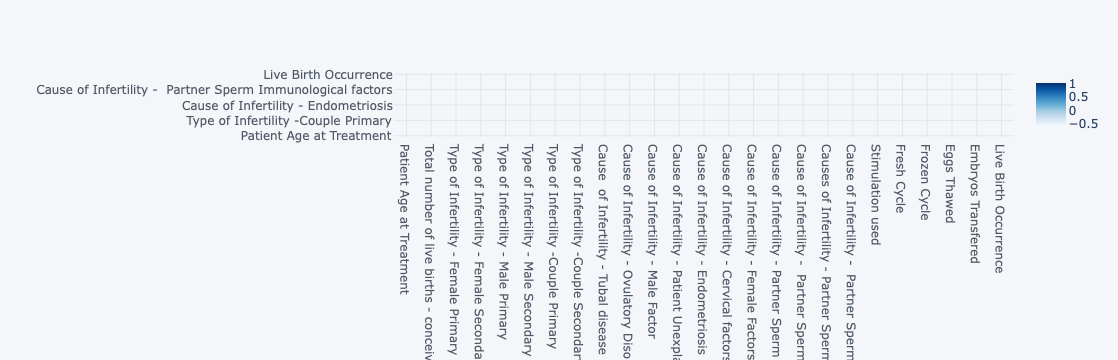

In [539]:
# 2024.03.25: 최신 pandas 버전에서는 doc.corr() 이 자동으로 문자컬럼을 제외하고, 계산해주지 않고, 에러를 냄
# 2024.03.25: 다음과 같이 numeric_only=True 옵션을 기재해줘야 함
# train.corr().iplot(kind='heatmap', colorscale='Blues')
train_df.corr(numeric_only=True).iplot(kind='heatmap', colorscale='Blues')

In [541]:
train_df.info()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
Index: 178743 entries, 410225 to 306985
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Patient Age at Treatment                                     178743 non-null  float64
 1   Total Number of Previous IVF cycles                          178743 non-null  object 
 2   Total number of IVF pregnancies                              178743 non-null  object 
 3   Total number of live births - conceived through IVF          178743 non-null  int64  
 4   Type of Infertility - Female Primary                         178743 non-null  int64  
 5   Type of Infertility - Female Secondary                       178743 non-null  int64  
 6   Ty

In [549]:
train_df.head()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,...,Egg Source,Sperm From,Fresh Cycle,Frozen Cycle,Eggs Thawed,Fresh Eggs Collected,Eggs Mixed With Partner Sperm,Embryos Transfered,Live Birth Occurrence,Patient ID
410225,2.0,0,0,0,0,0,0,0,0,0,...,Patient,Partner,1.0,0.0,0.0,11,11,1.0,0.0,167176
426356,2.0,0,0,0,0,0,0,0,0,0,...,Patient,Partner,1.0,0.0,0.0,1,1,1.0,1.0,174255
72623,1.0,0,0,0,0,0,0,0,0,0,...,Patient,Partner,1.0,0.0,0.0,13,13,1.0,0.0,29620
400026,3.0,2,1,0,0,0,0,0,0,0,...,Patient,Partner,1.0,0.0,0.0,7,6,3.0,0.0,162767
311355,3.0,1,0,0,0,0,0,0,0,0,...,Patient,Partner,1.0,0.0,0.0,8,5,2.0,0.0,123844


In [586]:
b.head()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,...,Stimulation used,Egg Source,Sperm From,Fresh Cycle,Frozen Cycle,Eggs Thawed,Fresh Eggs Collected,Eggs Mixed With Partner Sperm,Embryos Transfered,Live Birth Occurrence
1,45-50,3,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,4,3,2.0,0.0
2,35-37,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,12,0,0.0,0.0
8,18 - 34,3,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,31,13,0.0,0.0
14,18 - 34,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,8,8,0.0,0.0
15,35-37,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,11,11,1.0,0.0


In [618]:
df = b.copy()

In [620]:
df.head()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,...,Stimulation used,Egg Source,Sperm From,Fresh Cycle,Frozen Cycle,Eggs Thawed,Fresh Eggs Collected,Eggs Mixed With Partner Sperm,Embryos Transfered,Live Birth Occurrence
1,45-50,3,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,4,3,2.0,0.0
2,35-37,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,12,0,0.0,0.0
8,18 - 34,3,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,31,13,0.0,0.0
14,18 - 34,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,8,8,0.0,0.0
15,35-37,0,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,11,11,1.0,0.0


,Patient ID,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Total number of live births - conceived through IVF,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,...,Stimulation used,Egg Source,Sperm From,Fresh Cycle,Frozen Cycle,Eggs Thawed,Fresh Eggs Collected,Eggs Mixed With Partner Sperm,Embryos Transfered,Live Birth Occurrence
1,0,5,3,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,4,3,2.0,0.0
2,1,1,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,12,0,0.0,0.0
8,2,999,3,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,31,13,0.0,0.0
14,3,999,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,8,8,0.0,0.0
15,4,1,0,0,0,0,0,0,0,0,...,1,Patient,Partner,1.0,0.0,0.0,11,11,1.0,0.0


In [632]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터프레임 로드 (이미 로드되어 있다고 가정)
# df = pd.read_csv('your_file.csv')

# 데이터를 9:1 비율로 훈련 데이터와 테스트 데이터로 분리
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)  # test_size=0.1은 전체 데이터의 10%를 테스트 데이터로 설정

# 훈련 데이터와 테스트 데이터의 shape 확인
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)


Train DataFrame shape: (178743, 32)
Test DataFrame shape: (19861, 32)


In [636]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report


In [704]:

# 'Live Birth Occurrence' 열이 타겟 변수입니다. 이를 y로 설정합니다.
X = df.drop('Live Birth Occurrence', axis=1)  # 타겟 변수를 제외한 나머지 데이터
y = df['Live Birth Occurrence']  # 타겟 변수

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [712]:
# 랜덤 포레스트 모델 초기화 및 훈련
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [714]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가: F1-score 계산
f1 = f1_score(y_test, y_pred, average='binary')  # 'binary' 옵션은 이진 분류를 가정합니다. 다중 클래스의 경우 'macro', 'micro', 'weighted'를 고려하세요.
print(f"F1-Score: {f1}")
print(classification_report(y_test, y_pred))


F1-Score: 0.3119712738116974
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     30642
           1       0.35      0.28      0.31      9079

    accuracy                           0.72     39721
   macro avg       0.57      0.56      0.57     39721
weighted avg       0.70      0.72      0.70     39721



In [688]:
df['Eggs Mixed With Partner Sperm'].unique()

array(['3', '0', '13', '8', '11', '10', '7', '1', '4', '6', '12', '5',
       '16', '9', '33', '2', '14', '17', '24', '15', '23', '19', '18',
       '21', '20', '22', '25', '26', '27', '> 50', '28', '38', '34', '30',
       '29', '36', '37', '31', '43', '32', '42', '46', '35', '45', 14, 0,
       3, 9, 8, 17, 7, 5, 12, 2, 6, 4, 15, 13, 10, 1, 11, 16, 18, 20, 26,
       22, 21, 24, 19, 25, 30, 32, 29, 38, 28, 35, 23, 36, 37, 41, 27, 48,
       31, 39, 40, 33, 34, 49, 44, 42, 43, 46, 47, '39', '40', '49', '41',
       50, '47', '44', '48'], dtype=object)

In [660]:
# '5>=' 값을 10으로 변경
df['Egg Source'] = df['Egg Source'].replace('Patient', 1)
df['Sperm From'] = df['Egg Source'].replace('Partner', 1)

/var/folders/t0/gccsxj_j0nggb15blb8q8h900000gn/T/ipykernel_10391/130722799.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [690]:
# '5>=' 값을 10으로 변경
df['Eggs Mixed With Partner Sperm'] = df['Eggs Mixed With Partner Sperm'].replace('> 50', 60)


In [702]:

df['Live Birth Occurrence'] = df['Live Birth Occurrence'].apply(lambda x: 1 if x >= 1 else 0)



In [710]:
df['Live Birth Occurrence'].unique()

array([0, 1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 모델 초기화
rf = RandomForestClassifier()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [ ]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가: F1-score 계산
f1 = f1_score(y_test, y_pred, average='binary')  # 'binary' 옵션은 이진 분류를 가정합니다. 다중 클래스의 경우 'macro', 'micro', 'weighted'를 고려하세요.
print(f"F1-Score: {f1}")
print(classification_report(y_test, y_pred))


In [ ]:
# 테스트 데이터의 예측 확률
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 1 클래스에 대한 확률

# ROC AUC 점수 계산
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2%}")
